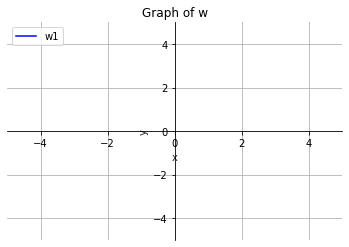

In [91]:
import  tensorflow  as  tf
from matplotlib import pyplot as plt
import numpy as np
tf.executing_eagerly() # 계산 그래프를 즉시 실행 executing_eagerly사용

x = tf.constant(3.0)

with tf.GradientTape() as g: # with 내부 계산을 기록 
    g.watch(x) # x를 기록
    y = 2 * x #미분 방정식
    
g.gradient(y, x).numpy() # x = 3 일때 y의 기울기를 구한다.

tf.executing_eagerly()  # 계산 그래프를 즉시 실행 executing_eagerly 사용
x  =  tf . constant (3.0 )  
with  tf . GradientTape ()  as  g :  # with 내부 계산을 기록
   g . watch ( x )  # x를 기록
   y  =  2  *  x  # 미분 방정식
g.gradient( y ,  x ).numpy()  # x = 3 일 때의 y 기울기를 구한다. 


fig = plt.figure()  # 그림그리는 바탕을 fig로 만들겠다.
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y, '-b', label='w1')
plt.xlim(-5, 5)  # x 축의 눈금숫자의 시작과 마지막
plt.ylim(-5, 5)  # y 축의 눈금숫자의 시작과 마지막
plt.title('Graph of w')
plt.xlabel('x', color='#1C2833')  # x의 라벨 색깔
plt.ylabel('y', color='#1C2833')  # y의 라벨 색깔
plt.legend(loc='upper left')  # 레전드가 왼쪽에 나오게
plt.grid()  # 격자모양출력
plt.show()

In [92]:
x = tf.Variable(3.0)

with tf.GradientTape() as g:
    y= x*x
    
g.gradient(y,x).numpy()

6.0

In [93]:
def with_if(x):
    if x<= 0 :
        return x *2 #기울기가2
    else:
        return x*x*x # 3*x*x
    
def with_if_gradient(n):
    x = tf.Variable(n)
    with tf.GradientTape() as g:
        y = with_if(x)
        print('n = %.1f : gradient = %.1f' %(n,g.gradient(y,x)))


with_if_gradient(-3.0)
with_if_gradient(0.0)
with_if_gradient(3.0)

n = -3.0 : gradient = 2.0
n = 0.0 : gradient = 2.0
n = 3.0 : gradient = 27.0


In [94]:
a = tf.Variable(3.0)
b = tf.Variable(4.0)

with tf.GradientTape() as g:
    f = a ** 2+ 5 * b #다변량 미분 공식

g.gradient(f, [a, b])

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [95]:
a = tf.Variable(3.0)
b = tf.Variable(4.0)

with tf.GradientTape() as g:
    f = a ** 2+ 5 * b #다변량 미분 공식

g.gradient(f, [b,[a]])

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 [<tf.Tensor: shape=(), dtype=float32, numpy=6.0>]]

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.models import *
model = Sequential()

input_layer = Dense(32, input_shape = (8,))
model.add(input_layer)

hidden_layer = Dense(64, activation = 'relu')
model.add(hidden_layer)

output_layer = Dense(8)
model.add(output_layer)

layers = model.layers
layers

inputs = model.inputs #모델의 모든 입력텐서를 반환한다.
print(inputs)

output = model.outputs
print(output)

#model.get_weights() - 모든 가중치를 numpy 배열로 변환한다.
#model.get_weights()
#model.set_weights()

[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_69_input')>]
[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_71')>]


In [97]:
from keras.models import model_from_json
# 모델의 직렬화
config = model.get_config()
config

#로드 
json_string = model.to_json()
json_string

new_model = model_from_json(json_string)
new_model

#모델값을 문자열로
res = model. to_yaml()
res

#모델 요약
model.summary()

#모델 훈련 및 예측 : 컴파일(모델의 학습과정) -> fit(훈련데이터를 사용해서 모델을 훈련) -> 평가(테스트데이터를 사용해서 모델 평가) -> 예측(새로운 입력에대한 결과 예측)


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_70 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 520       
Total params: 2,920
Trainable params: 2,920
Non-trainable params: 0
_________________________________________________________________


In [98]:
model = Sequential()

input_layer = Dense(32, input_shape = (8,))
model.add(input_layer)
model.get_weights()


[array([[ 0.34141874, -0.3717669 ,  0.37441093,  0.08332562,  0.06092119,
          0.19284636,  0.14747602,  0.35302806, -0.21300955, -0.18323757,
         -0.09759626, -0.3828151 ,  0.22849703, -0.37413198,  0.34068465,
         -0.18250883, -0.21929848, -0.04562613,  0.3044085 ,  0.33505195,
          0.06624445,  0.26328808,  0.12576127, -0.11665091, -0.35509285,
          0.06987828, -0.0438886 , -0.06425935, -0.1716309 , -0.03619233,
          0.14274186,  0.31899267],
        [ 0.00066152,  0.16323268,  0.36370564, -0.28827047, -0.15038663,
         -0.2762468 ,  0.07155681,  0.3401413 , -0.33260164,  0.32290244,
          0.21387792,  0.03726494,  0.3176545 ,  0.15990132,  0.1120995 ,
         -0.06733757, -0.12820715, -0.3086764 , -0.07794178,  0.32554948,
         -0.00695959, -0.1012733 ,  0.07370555,  0.17963308, -0.14665493,
         -0.27190003,  0.33144474, -0.02769491, -0.27753937, -0.30460784,
         -0.03767824, -0.05267549],
        [-0.0518319 , -0.12322313, -0.13

compile(
    optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,
    weighted_metrics=None, run_eagerly=None, steps_per_execution=None, **kwargs
)

fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)

In [102]:
#tensorboardX
from tensorboardX import SummaryWriter
from datetime import datetime
from packaging import version
import keras

summary = SummaryWriter()
logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

Epoch 1/10
4/4 [==============================] - 8s 948ms/step - loss: 11.5403 - accuracy: 0.0683 - val_loss: 11.4477 - val_accuracy: 0.1025
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 11.4883 - accuracy: 0.0821 - val_loss: 11.4544 - val_accuracy: 0.1050
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 11.4593 - accuracy: 0.1330 - val_loss: 11.4639 - val_accuracy: 0.1025
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 11.5251 - accuracy: 0.1366 - val_loss: 11.4765 - val_accuracy: 0.1050
Epoch 5/10
4/4 [==============================] - 0s 24ms/step - loss: 11.5017 - accuracy: 0.1435 - val_loss: 11.4912 - val_accuracy: 0.1050
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 11.5597 - accuracy: 0.1310 - val_loss: 11.5092 - val_accuracy: 0.1000
Epoch 7/10
4/4 [==============================] - 0s 23ms/step - loss: 11.5858 - accuracy: 0.1256 - val_loss: 11.5284 - val_accuracy: 0.1050
Epoch 8/10
4

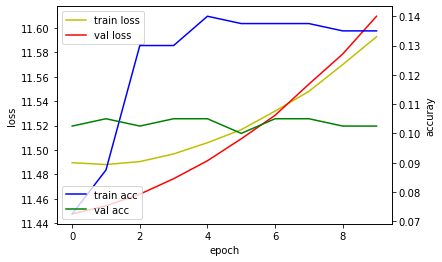

'\nloss: epochs이 한번 돌때마다 훈련 손실값\naccuracy:  epochs이 한번 돌때마다 정확도\nval_loss:\nval_accuracy:\n'

In [103]:
from tensorboardX import SummaryWriter
from datetime import datetime
from packaging import version
from keras.layers import *
import matplotlib.pyplot as plt

#tensorboardX
summary = SummaryWriter()
logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#임의의 데이터
x_train = np.random.random((100,4,8))
y_train = np.random.random((100,4,10))

#임의의 유효성 검사 데이터
x_val = np.random.random((100,4,8))
y_val = np.random.random((100,4,10))

#순차 모델링
model = tf.keras.Sequential()

#모델 추가, 레이어 추가
model.add(LSTM(16, return_sequences =True)) #순환 신경망 모델
model.add(Dense(10, activation='softmax'))

#모델 컴파일 
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#데이터 훈련
hist = model.fit(x_train, y_train, batch_size=32, epochs =10, validation_data = (x_val,y_val), callbacks = [tensorboard_callback])
print(type(hist))
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
#fit() 히스토리 기능
'''
loss: epochs이 한번 돌때마다 훈련 손실값
accuracy:  epochs이 한번 돌때마다 정확도
val_loss:
val_accuracy:
'''


In [154]:
#One - Hot Encoding
from tensorflow.keras.preprocessing.text import Tokenizer

str ='배고파요오오 나는 휴일이 좋습니다. 나는 매일 휴일이였으면 좋겠다.'
tokenizer = Tokenizer()
tokenizer.fit_on_texts([str])
print(tokenizer.word_index)

{'나는': 1, '배고파요오오': 2, '휴일이': 3, '좋습니다': 4, '매일': 5, '휴일이였으면': 6, '좋겠다': 7}


In [155]:
encode = tokenizer.texts_to_sequences([str])[0]
print(encode)

[2, 1, 3, 4, 1, 5, 6, 7]


In [156]:
onehot = tf.keras.utils.to_categorical(encode,14)
print(onehot)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [157]:
# 모델링 학습을 해보자
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import backend as K
from sklearn.utils import shuffle
import tensorflow as tf

In [163]:
#데이터 로드
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train_x = train.drop('Survived', axis=1)
train_y = train['Survived']

test_x =test

#결측값 삭제하기
train_x= train_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x = test_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)

#결측값 채우기 중앙값으로
train_age_median = train_x['Age'].median()
train_x['Age'] = train_x['Age'].fillna(train_age_median)
train_x["Embarked"] = train_x["Embarked"].fillna("S")

#test 결측값 채우기
test_age_median =test_x["Age"].median()
test_x['Age'] = test_x['Age'].fillna(test_age_median)

test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].describe()[5])

#더미 컬럼 생성 
train_x_dummy = pd.get_dummies(train_x, columns=['Sex','Embarked'])
test_x_dummy = pd.get_dummies(test_x, columns=['Sex','Embarked'])

#one - hot
train_y_onehot = np_utils.to_categorical(train_y)
train_x_dummy_array = train_x_dummy.values.astype('float32')

In [166]:
#모델 생성
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

#컴파일 
#model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'RMSprop', loss='mse', metrics = ['accuracy'])

#fit
mycall = tf.keras.callbacks.EarlyStopping(monitor = 'loss, patience =2, verbose=1, mode =accuracy')
model.fit(train_x_dummy_array, train_y_onehot, epochs=10, batch_size =32, callbacks=[mycall])

#저장
model.save('res.h5')

Epoch 1/10
28/28 [==============================] - 1s 1ms/step - loss: 0.3520 - accuracy: 0.6159
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.6460
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.6230
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.6054
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.6093
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.6143
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.6361
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.6360
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.6116
Epoch 10/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.6165


In [167]:
res = pd.read_hdf('res.h5')
res

ValueError: Dataset(s) incompatible with Pandas data types, not table, or no datasets found in HDF5 file.